<a href="https://colab.research.google.com/github/shinb-bong/TIL/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN
---
단어 예측도 Dense 레이어로 학습이 가능하다.

각 단어에 대해 점수를 주거나 혹은 one-hot encoding 을 하면된다.

하지만 예상과 다른 결과가 나올 때가 있다.
그럴경우 RNN을 사용하면 되는데

simple RNN 레이어 
인풋 -> tanh -> 예측 모델이지만 재사용이 계속된다.

여기서 특징은! 첫 단어에 대해 예측된 결과를 일부 사용하여 다음 예측때 반영을 한다.(hidden state)


결론: Sequence 데이터 학습에서 좋다.
단어, 음성, 가격

1. 인풋 vector -> Sequence 예측가능
(그림을 넣었을때 자막을 달고 싶을때)
2. Sequence 입력 -> Vector 예측
(긴문장 -> 긍정글인지 아닌지)
3. Sequence -> Sequence 
(번역) seq to vec to seq

LSTM(Long Short Term Memory)
----
Simple RNN의 문제:Diminishing Gradient

- 점점 진행될수록 초기의 데이터가 계속 레이어를 거쳐가면서 비중이 줄어드는 현상

cell state를 추가로 내뱉는 LSTM을 사용함

- forget gate
- input gate
- output gate(hidden state 연산하는 곳)

In [ ]:
tf.keras.layers.LSTM(128,input_shape=(?,?))

LSTM 보다 간단한 레이어 참고: GRU

실습(작곡 AI 만들기)
---

In [ ]:
import tensorflow as tf

text = open('drive/MyDrive/pianoabc.txt','r').read()
print(text)

# 1. Bag of words 만들기
u_text = list(set(text))
u_text.sort()
print(u_text)

# 2.문자-> 숫자 변환기(utilites)
text_to_num = {}
num_to_text = {}

for i , data in enumerate(u_text):
  text_to_num[data]= i
  num_to_text[i] = data

# 악보 숫자화 시키기
numbering = []
for i in text:
  numbering.append( text_to_num[i])

print(numbering) 

# print(text_to_num['A'])

# sequence to vector 
X = []
Y = []

# index range 주의
for i in range(0,len(numbering)-25):
  X.append(numbering[i:i+25])
  Y.append(numbering[i+25])

import numpy as np
print(np.array(X).shape)

# one- hot encoding 진행 (원하는것, 유니크한 문자의 갯수)
X = tf.one_hot(X,31)
Y = tf.one_hot(Y,31)
print(X[0:2])




In [ ]:
# model
model = tf.keras.models.Sequential([
                                    # 처음 레이어 인풋 쉐이프 명시
                                    tf.keras.layers.LSTM(100,input_shape = (25,31)),
                                    # 어떤 문자를 예측하는 문제와 비슷함(31개의 결과, 활성함수)
                                    tf.keras.layers.Dense(31,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])

# 64개 학습후 업데이트해달라, epochs는 LSTM은 많이 필요하다. verbose는 학습중 출력되는 것을 줄여달라는 것
model.fit(X,Y,batch_size = 64, epochs=60, verbose=2 )
model.save('drive/MyDrive/Lstm')

Epoch 1/60
4563/4563 - 109s - loss: 1.5995 - accuracy: 0.4964 - 109s/epoch - 24ms/step
Epoch 2/60
4563/4563 - 106s - loss: 1.2967 - accuracy: 0.5737 - 106s/epoch - 23ms/step
Epoch 3/60
4563/4563 - 105s - loss: 1.2026 - accuracy: 0.6038 - 105s/epoch - 23ms/step
Epoch 4/60
4563/4563 - 106s - loss: 1.1464 - accuracy: 0.6230 - 106s/epoch - 23ms/step
Epoch 5/60
4563/4563 - 104s - loss: 1.1076 - accuracy: 0.6358 - 104s/epoch - 23ms/step
Epoch 6/60
4563/4563 - 105s - loss: 1.0784 - accuracy: 0.6456 - 105s/epoch - 23ms/step
Epoch 7/60
4563/4563 - 105s - loss: 1.0549 - accuracy: 0.6533 - 105s/epoch - 23ms/step
Epoch 8/60
4563/4563 - 105s - loss: 1.0353 - accuracy: 0.6596 - 105s/epoch - 23ms/step
Epoch 9/60
4563/4563 - 105s - loss: 1.0181 - accuracy: 0.6649 - 105s/epoch - 23ms/step
Epoch 10/60
4563/4563 - 104s - loss: 1.0035 - accuracy: 0.6705 - 104s/epoch - 23ms/step
Epoch 11/60
4563/4563 - 104s - loss: 0.9893 - accuracy: 0.6748 - 104s/epoch - 23ms/step
Epoch 12/60
4563/4563 - 104s - loss: 0.97

만든 모델로 예측하기

In [ ]:
# 저장해 놓은 모델 파일 불러오기

import tensorflow as tf
Pmodel = tf.keras.models.load_model('drive/MyDrive/Lstm')

# Predict

text = open('drive/MyDrive/pianoabc.txt','r').read()
print(text)

# 1. Bag of words 만들기
u_text = list(set(text))
u_text.sort()
print(u_text)

# 2.문자-> 숫자 변환기(utilites)
text_to_num = {}
num_to_text = {}

for i , data in enumerate(u_text):
  text_to_num[data]= i
  num_to_text[i] = data

# 악보 숫자화 시키기
numbering = []
for i in text:
  numbering.append( text_to_num[i])

print(numbering) 

# one - hot 인코딩 (예측값)
first_input = numbering[117:117+25]
first_input = tf.one_hot(first_input,31)
# 오류에 의해 차원을 증가시켜줘야함. 
first_input = tf.expand_dims(first_input, axis =0)
print(first_input)

result_predict= Pmodel.predict(first_input)
# 예측된 확률
print(result_predict)

import numpy as np
# 확률의 최댓값 
result_predict = np.argmax(result_predict[0])

print(num_to_text[result_predict])

0. 첫 입력값 만들기
1. Predict로 다음 문자 예측
2. 예측한 다음문자를 리스트에 저장
3. 첫입력값 앞에 하나짜르기
4. 예측한 다음문자 뒤에 넣기
5. 원핫인코딩하기, expand dims 

In [22]:
music = []

for i in range(200):

  result_predict = Pmodel.predict(first_input)
  result_predict = np.argmax(result_predict[0])

  # 예측값 music 결과에 넣기
  music.append(result_predict)

  # 다음 예측을 위해 자료 준비
  next_input = first_input.numpy()[0][1:]

  # 다음 들어올 한가지 값 one-hot 인코딩해서 넣어주기
  one_hot_num = tf.one_hot(result_predict,31)
  # print("one-hot: " , one_hot_num)

  # 맨뒤에 삽입
  first_input = np.vstack([next_input,one_hot_num.numpy()])
  first_input = tf.expand_dims(first_input,axis=0)

print(music)


[26, 0, 14, 0, 27, 28, 27, 0, 17, 0, 26, 25, 26, 0, 14, 0, 27, 25, 14, 14, 25, 14, 0, 18, 0, 15, 20, 15, 0, 14, 10, 0, 27, 26, 25, 0, 17, 0, 26, 6, 26, 5, 13, 13, 14, 0, 17, 0, 26, 5, 26, 26, 27, 28, 0, 14, 0, 27, 25, 14, 25, 15, 14, 0, 15, 0, 15, 25, 26, 0, 18, 10, 0, 15, 25, 27, 0, 14, 0, 23, 5, 27, 25, 5, 27, 0, 14, 0, 27, 25, 14, 14, 25, 26, 0, 18, 0, 27, 5, 27, 27, 28, 27, 0, 20, 0, 26, 5, 26, 26, 15, 20, 0, 14, 0, 14, 5, 15, 25, 5, 15, 0, 14, 0, 14, 15, 14, 0, 17, 10, 0, 14, 20, 14, 0, 20, 0, 15, 6, 20, 5, 14, 0, 20, 0, 15, 20, 20, 0, 17, 10, 0, 14, 20, 19, 0, 20, 0, 20, 5, 20, 0, 17, 10, 0, 14, 5, 26, 0, 20, 0, 15, 5, 20, 0, 17, 10, 0, 14, 5, 20, 0, 20, 0, 15, 5, 15, 0, 17, 10, 0, 14, 15, 25, 0, 20, 0, 26, 5, 15]


In [ ]:
music_text = []
for i in music:
  music_text.append(num_to_text[i])

print(''.join(music_text))

주의) 컴퓨터가 예측하기에 옳은 값을 보여주기때문에 반복성(도레미파솔도레미파솔) 이 나올수도 있기때문에 

예측에 랜덤성/변칙 부여하기

어떻게?

위코드의 
np.argmax(예측값[0])을 하지말고

파라미터는 (어디서, 몇개, 확률)

In [ ]:
np.random.choice(u_text,1,p=예측값[0])

을 사용하여 확률을 통해 약간의 랜덤성을 부여할 수 있다.

완성된 곡을 출력해보면

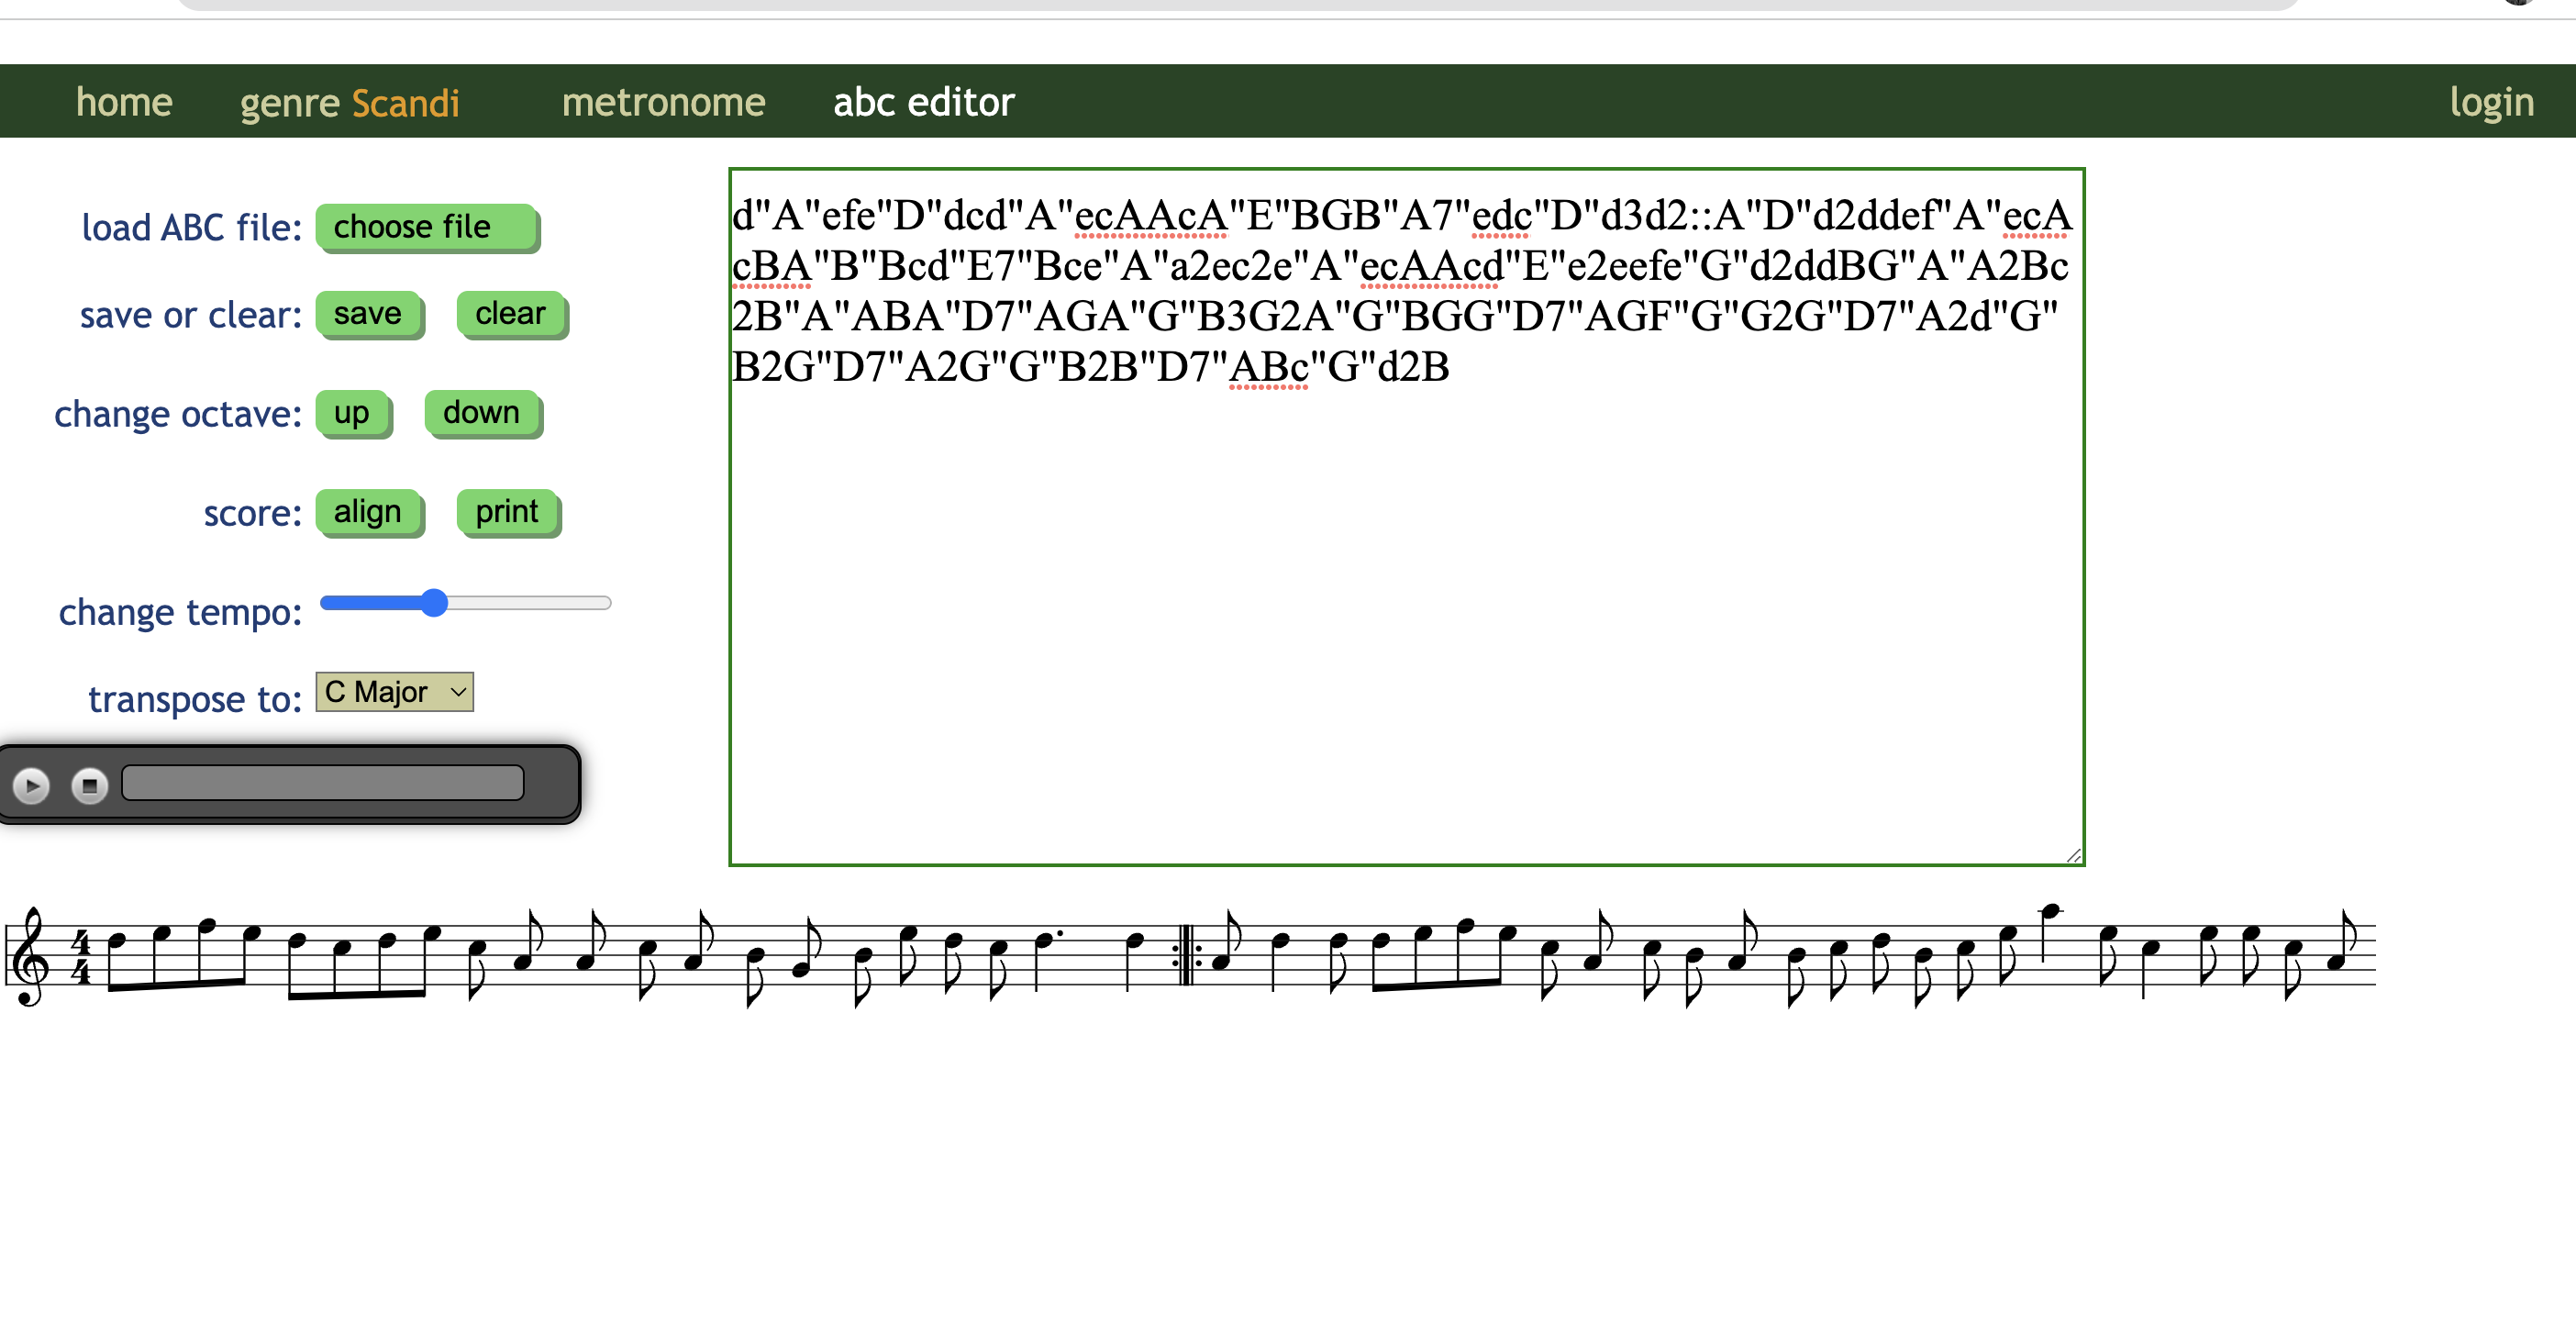

이러한 곡이 나온다...!